In [1]:
import matplotlib.pyplot as plt
import re
from collections import Counter
from collections import OrderedDict

Full CRISPR headers contain 3 fields: protein ID, protein product and phylum/species information. First, I separate the 3 fields into 3 different files, in order to analyze those fields separately.

In [2]:
hits = open("unique_CRISPR_asgard_hits.txt", "r")
hits = hits.readlines()
protein_id_pattern = re.compile("[A-Z0-9._]+[^ ]")
phylum_pattern = re.compile("[^ ]+archaeota")

phyla = []
crispr_hits_protein_id = open("crispr_hits_protein_id.txt", "w")
hits_products = open("crispr_hits_products.txt", "w")
hits_products_list = []
for hit in hits:
    product_pattern = re.compile("[ ].*\[")
    product = product_pattern.findall(hit)
    if len(product) > 0: # If a pattern has been found.
        product = product[0][1:-2]      
    else: # In some cases, there is no phylum information, so the product is everything after a blank space.
        product_pattern = re.compile("[ ].*")
        product = product_pattern.findall(hit)[0]  
    hits_products.write(product + "\n")
    hits_products_list.append(product)
    
    protein_id = protein_id_pattern.findall(hit)[0]
    crispr_hits_protein_id.writelines(protein_id + "\n") 
    
    phylum = phylum_pattern.findall(hit)
    # Obtain the phylum of each hit.
    try:
        phyla.append(phylum[0])
    except: # If there were no phylum patterns, it means the protein was not classified into a phylum.
        phyla.append("Unclassified")

crispr_hits_protein_id.close()
hits_products.close()

# Number of hits by phylum

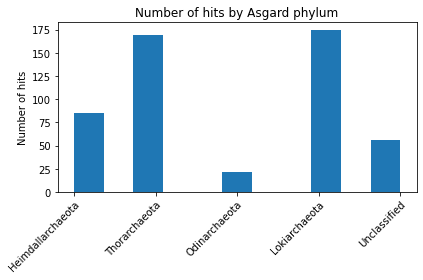

In [3]:
# Plotting the number of hits per phylum.

phyla_hist = plt.hist(phyla, bins = 11)
plt.xticks(rotation = 45, rotation_mode="anchor", ha="right")
plt.title("Number of hits by Asgard phylum")
plt.ylabel("Number of hits")
plt.tight_layout()
plt.savefig("Phyla_histogram.png")
plt.show()

# CRISPR-Cas enrichment by phylum

In order to study the CRISPR-Cas enrichment by phyla, first the number of proteins from each phylum in the database has to be determined. To start with, the headlines of all proteins were grouped with the following bash command:

cat asgard_proteomes.fasta | grep ">" > headlines_db.txt

In [4]:
# Obtaining the phylum of each protein in the database.

phyla_db = []
headlines = open("headlines_db.txt", "r")
pattern = re.compile("[^ ]+archaeota")

for line in headlines.readlines():
    
    phylum = pattern.findall(line)
    try:
        phyla_db.append(phylum[0])
    except:
        phyla_db.append("Unclassified")

In [5]:
counter_hits = Counter(phyla)
counter_db = Counter(phyla_db)

In [6]:
# Storing the CRISPR enrichment of each phylum in lists.

phyla_asgard = []
crispr_enrichment = []
for key in counter_hits: # For each phylum.
    enrichment = 100*counter_hits[key]/counter_db[key]
    print(key, enrichment)
    phyla_asgard.append(key)
    crispr_enrichment.append(enrichment)

Heimdallarchaeota 0.30143981842683876
Thorarchaeota 0.51450665205346
Odinarchaeota 1.3257575757575757
Lokiarchaeota 0.2558108763727782
Unclassified 0.7131940906775344


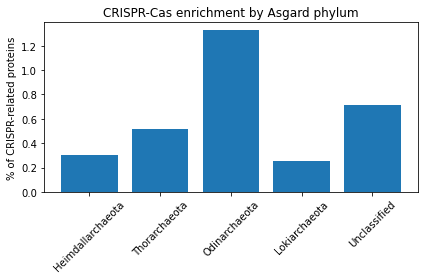

In [7]:
# Plotting CRISPR-Cas enrichment by phylum.

plt.bar(phyla_asgard, crispr_enrichment)
plt.title("CRISPR-Cas enrichment by Asgard phylum")
plt.ylabel("% of CRISPR-related proteins")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("CRISPR-Cas_enrichment.png")
plt.show()

# Hit analysis (by category and by CRISPR-Cas type)

Analyzing the "product" field of hits.

In [3]:
hits_products_list

['hypothetical protein HeimC3_48530',
 'CRISPR-associated protein Cas4',
 'CRISPR-associated protein Cas4',
 'CRISPR-associated exonuclease Cas4',
 'CRISPR-associated protein Cas4',
 'putative CRISPR-associated protein Cas4',
 'CRISPR-associated protein Cas4',
 'CRISPR-associated protein Cas4',
 'cas4: CRISPR-associated protein Cas4',
 'hypothetical protein DRP09_21080',
 'PD-(D/E)XK nuclease family protein',
 'ATP-dependent RecD-like DNA helicase',
 'hypothetical protein DRO87_07365',
 'hypothetical protein DRP09_09165',
 'hypothetical protein DRO93_04390',
 'hypothetical protein HeimC3_15620',
 'hypothetical protein DRO73_06080',
 'hypothetical protein E3J82_01995, partial',
 'hypothetical protein E3J86_14375',
 'hypothetical protein C4K47_09525',
 'hypothetical protein E3J82_05145, partial',
 'hypothetical protein C4K48_03820',
 'Replicase polyprotein 1ab, partial',
 'AAA ATPase',
 'hypothetical protein DRO67_07405',
 'hypothetical protein E3J43_04410, partial',
 'AAA ATPase',
 'hyp

In [3]:
hypothetical = [hit for hit in hits_products_list if "hypothetical" in hit]
CRISPR = [hit for hit in hits_products_list if "CRISPR" in hit]
helicase = [hit for hit in hits_products_list if "helicase" in hit]

categories = ["hypothetical", "CRISPR-related", "Helicase"]
categories_amounts = [len(hypothetical), len(CRISPR), len(helicase)]

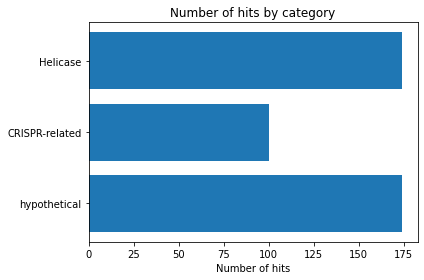

In [8]:
plt.barh(categories, categories_amounts)
plt.title("Number of hits by category")
plt.xlabel("Number of hits")
plt.tight_layout()
plt.savefig("Hits_by_category.png")
plt.show()

Create another barplot below the bar plot.

In [4]:
type_pattern = re.compile("[I]+-[A-Z]")
crispr_type = []
for hit in CRISPR:
    types = type_pattern.findall(hit)
    try:
        types = types[0]
        crispr_type.append(types)
    except:
        pass

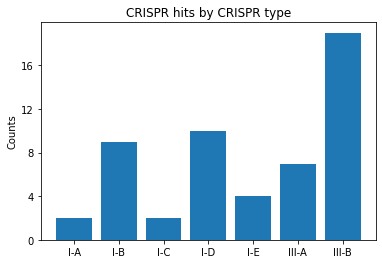

In [5]:
type_counts = Counter(crispr_type)
types = sorted(type_counts)
counts = [type_counts[typ] for typ in types]
plt.bar(types, counts)
plt.yticks(range(0,20,4))
plt.title("CRISPR hits by CRISPR type")
plt.ylabel("Counts")
plt.savefig("Hits_by_CRISPR_type.png")
plt.show()

In [32]:
crispr_pattern = re.compile("[a-zA-Z]{3}[0-9]+")
crispr_categories = []
for hit in CRISPR:
    crispr = crispr_pattern.findall(hit)
    try:
        crispr = crispr[0]
        crispr = crispr[0].upper() + crispr[1:] # Converting the first letter to uppercase.
        crispr_categories.append(crispr)
    except:
        pass

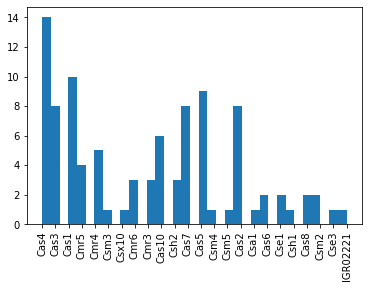

In [40]:
plt.hist(crispr_categories, bins = 35)
plt.xticks(rotation = "vertical")
plt.show()

As this plot is messy and not very informative, it was not included in the report.

# Neighborhood analysis by category and by CRISPR-Cas type

In [3]:
neighborhood_products = open("neighborhood_hits_products.txt", "r")
neighborhood_products = neighborhood_products.readlines()
neighborhood_products

['hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'DEAD-box ATP-dependent RNA helicase CshB\n',
 'Chaperone protein DnaK\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'putative ATP-dependent RNA helicase\n',
 "Pyrimidine 5'-nucleotidase YjjG\n",
 'Alpha-amylase 1\n',
 'hypothetical protein\n',
 'Tryptophan synthase beta chain 1\n',
 'Isoleucine--tRNA ligase\n',
 'Sulfide dehydrogenase [flavocytochrome c] flavoprotein chain precursor\n',
 'putative ski2-type helicase\n',
 "7, 8-dihydropterin-6-methyl-4-(beta-D-ribofuranosyl)- aminobenzene-5'-phosphate synthase\n",
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'putative ski2-type helicase\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'hypothetical protein\n',
 'Photosystem I assembly pr

In [4]:
hypothetical = [hit for hit in neighborhood_products if "hypothetical" in hit]
CRISPR = [hit for hit in neighborhood_products if "CRISPR" in hit]
helicase = [hit for hit in neighborhood_products if "helicase" in hit]

categories = ["hypothetical", "CRISPR-related", "Helicase"]
categories_amounts = [len(hypothetical), len(CRISPR), len(helicase)]

In [5]:
categories = ["CRISPR-related", "Helicase"]
categories_amounts = [len(CRISPR), len(helicase)]

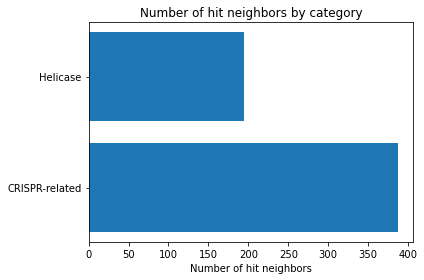

In [6]:
plt.barh(categories, categories_amounts)
plt.title("Number of hit neighbors by category")
plt.xlabel("Number of hit neighbors")
plt.tight_layout()
plt.savefig("Hit_neighbors_by_category.png")
plt.show()

In [16]:
type_pattern = re.compile("[I]+-[A-Z]")
crispr_type = []
for hit in CRISPR:
    types = type_pattern.findall(hit)
    try:
        types = types[0]
        crispr_type.append(types)
    except:
        pass

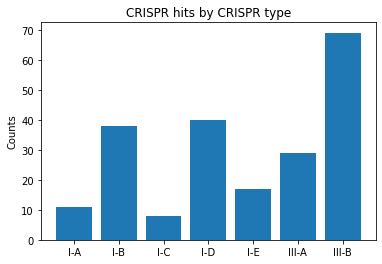

In [18]:
type_counts = Counter(crispr_type)
types = sorted(type_counts)
counts = [type_counts[typ] for typ in types]
plt.bar(types, counts)
plt.title("CRISPR hits by CRISPR type")
plt.ylabel("Counts")
# plt.savefig("Hits_by_CRISPR_type.png")
plt.show()

This plot was not included in the report because the result is almost the same as the result of CRISPR-Cas types in hits (instead of in hit neighborhoods).

# CRISPR-Cas system diagrams

In [7]:
from Bio.Graphics import GenomeDiagram
from Bio.SeqFeature import SeqFeature, FeatureLocation

In [8]:
colors = {"Cas1": "red", "Cas2": "green", "Cas3": "lightblue", "Cas4": "brown", "Cas5": "white", "Cas6": "darkblue", "Cas7": "magenta", "Cas8": "yellow", "Cas9": "lightgreen", "Cas10": "black", "Cse2": "blue", "Csa5": "olive", "Csm1": "pink", "Csm2": "blue", "Csm3": "green", "Csm4": "orange", "Csm5": "white", "Csx10": "gray", "HNH endonuclease": "cyan"}

def create_crispr_diagram(diagram_name, feature_list):
    diagram = GenomeDiagram.Diagram("Diagram")
    track = diagram.new_track(1, name = "Features")
    feature_set = track.new_set()
    
    system_start = feature_list[0][0]
    
    for feature in feature_list:
       
        if feature[3] == "CRISPR array":
            start = feature[0]-system_start
            end = feature[1]-system_start
            newfeat = SeqFeature(FeatureLocation(start, int(start + (end-start)*(1/4)), strand = feature[2]))
            feature_set.add_feature(newfeat, label = True, label_size = 20, color = "black", sigil = "BOX", name = feature[3])
            newfeat = SeqFeature(FeatureLocation(int(start + (end-start)*(1/4)), int(start + (end-start)*(2/4)), strand = feature[2]))
            feature_set.add_feature(newfeat, label_size = 20, color = "yellow", sigil = "OCTO", name = feature[3])
            newfeat = SeqFeature(FeatureLocation(int(start + (end-start)*(2/4)), int(start + (end-start)*(3/4)), strand = feature[2]))
            feature_set.add_feature(newfeat, label_size = 20, color = "black", sigil = "BOX", name = feature[3])
            newfeat = SeqFeature(FeatureLocation(int(start + (end-start)*(3/4)), end, strand = feature[2]))
            feature_set.add_feature(newfeat, label_size = 20, color = "yellow", sigil = "OCTO", name = feature[3])

        else:
            newfeat = SeqFeature(FeatureLocation(feature[0] - system_start, feature[1] - system_start, strand = feature[2]))
            feature_set.add_feature(newfeat, label = True, label_size = 20, color = colors[feature[3]], sigil = "ARROW", name = feature[3])
    diagram.draw(format = "linear", fragments = 1)
    diagram.write(diagram_name, "PNG")

In [9]:
OLS12944_features = [[7816, 8634, 1, "Cse2"], [8749, 9987, 1, "Cas7"], [10729, 11532, 1, "Cas6"],[10001, 10729, 1, "Cas5"],
              [13198, 13824, 1, "Cas2"], [12071, 13171, 1, "Cas1"], [14094, 16927, 1, "CRISPR array"]]
create_crispr_diagram("OLS12944.1.png", OLS12944_features)

In [10]:
OLS18990_features = [[37, 184, -1, "CRISPR array"], [296, 889, -1, "Cas4"], [898, 1173, -1, "Cas2"], [1179, 2186, -1, "Cas1"],[2223, 3170, -1, "Cas4"],
              [3256, 5828, -1, "Cas3"], [6989, 7819, -1, "Cas5"], [7821, 8774, -1, "Cas7"], [8771, 9127, -1, "Csa5"], [9831, 10781, -1, "Cas6"], [10911, 11062, -1, "CRISPR array"]]
create_crispr_diagram("OLS18990.1.png", OLS18990_features)

In [11]:
TKJ26803_features = [[2903, 3802, 1, "CRISPR array"], [6101, 8731, 1, "Cas10"], [8802, 9233, 1, "Csm2"], [9223, 10026, 1, "Csm3"],[10001, 11170, 1, "Csm4"],
              [11178, 12485, 1, "Csm5"], [16123, 17495, 1, "CRISPR array"]]
create_crispr_diagram("TKJ26803.1.png", TKJ26803_features)

In [12]:
TXT67219_features = [[30, 1773, 1, "CRISPR array"], [8221, 9984, 1, "Cas10"], [10001, 12316, 1, "Csx10"], [12358, 13794, 1, "HNH endonuclease"]]
create_crispr_diagram("TXT67219.1.png", TXT67219_features)